In [525]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.offline as pyo
pyo.init_notebook_mode()

import plotly.express as px

# read the file and see data type

In [630]:
df_melb = pd.read_csv('melb_data.csv')
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [528]:
df_melb.head(10)

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford    40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford         55a Park St      4    h  1600000.0     VB  Nelson   
5  Abbotsford      129 Charles St      2    h   941000.0      S  Jellis   
6  Abbotsford        124 Yarra St      3    h  1876000.0      S  Nelson   
7  Abbotsford       98 Charles St      2    h  1636000.0      S  Nelson   
8  Abbotsford  6/241 Nicholson St      1    u   300000.0      S  Biggin   
9  Abbotsford       10 Valiant St      2    h  1097000.0      S  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   
5  7/05/2016       2.5    3067.0  ...       1.0  0.0     181.0           NaN   
6  7/05/2016       2.5    3067.0  ...       2.0  0.0     245.0         210.0   
7  8/10/2016       2.5    3067.0  ...       1.0  2.0     256.0         107.0   
8  8/10/2016       2.5    3067.0  ...       1.0  1.0       0.0           NaN   
9  8/10/2016       2.5    3067.0  ...       1.0  2.0     220.0          75.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   
5        NaN        Yarra  -37.8041    144.9953  Northern Metropolitan   
6     1910.0        Yarra  -37.8024    144.9993  Northern Metropolitan   
7     1890.0        Yarra  -37.8060    144.9954  Northern Metropolitan   
8        NaN        Yarra  -37.8008    144.9973  Northern Metropolitan   
9     1900.0        Yarra  -37.8010    144.9989  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  
5        4019.0  
6        4019.0  
7        4019.0  
8        4019.0  
9        4019.0  

[10 rows x 21 columns]

In [529]:
df_melb.tail(10)

Suburb        Address  Rooms Type      Price Method  \
13570  Wantirna South  34 Fewster Dr      3    h   970000.0      S   
13571  Wantirna South     15 Mara Cl      4    h  1330000.0      S   
13572        Watsonia  76 Kenmare St      2    h   650000.0     PI   
13573        Werribee    5 Nuragi Ct      4    h   635000.0      S   
13574     Westmeadows     9 Black St      3    h   582000.0      S   
13575   Wheelers Hill   12 Strada Cr      4    h  1245000.0      S   
13576    Williamstown  77 Merrett Dr      3    h  1031000.0     SP   
13577    Williamstown    83 Power St      3    h  1170000.0      S   
13578    Williamstown   96 Verdon St      4    h  2500000.0     PI   
13579      Yarraville     6 Agnes St      4    h  1285000.0     SP   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
13570          Barry  26/08/2017      14.7    3152.0  ...       2.0  2.0   
13571          Barry  26/08/2017      14.7    3152.0  ...       2.0  2.0   
13572       Morrison  26/08/2017      14.5    3087.0  ...       1.0  1.0   
13573  hockingstuart  26/08/2017      14.7    3030.0  ...       2.0  1.0   
13574            Red  26/08/2017      16.5    3049.0  ...       2.0  2.0   
13575          Barry  26/08/2017      16.7    3150.0  ...       2.0  2.0   
13576       Williams  26/08/2017       6.8    3016.0  ...       2.0  2.0   
13577          Raine  26/08/2017       6.8    3016.0  ...       2.0  4.0   
13578        Sweeney  26/08/2017       6.8    3016.0  ...       1.0  5.0   
13579        Village  26/08/2017       6.3    3013.0  ...       1.0  1.0   

       Landsize  BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
13570     674.0           NaN        NaN          NaN -37.88360   145.22805   
13571     717.0         191.0     1980.0          NaN -37.86887   145.22116   
13572     210.0          79.0     2006.0          NaN -37.70657   145.07878   
13573     662.0         172.0     1980.0          NaN -37.89327   144.64789   
13574     256.0           NaN        NaN          NaN -37.67917   144.89390   
13575     652.0           NaN     1981.0          NaN -37.90562   145.16761   
13576     333.0         133.0     1995.0          NaN -37.85927   144.87904   
13577     436.0           NaN     1997.0          NaN -37.85274   144.88738   
13578     866.0         157.0     1920.0          NaN -37.85908   144.89299   
13579     362.0         112.0     1920.0          NaN -37.81188   144.88449   

                       Regionname Propertycount  
13570        Eastern Metropolitan        7082.0  
13571        Eastern Metropolitan        7082.0  
13572       Northern Metropolitan        2329.0  
13573        Western Metropolitan       16166.0  
13574       Northern Metropolitan        2474.0  
13575  South-Eastern Metropolitan        7392.0  
13576        Western Metropolitan        6380.0  
13577        Western Metropolitan        6380.0  
13578        Western Metropolitan        6380.0  
13579        Western Metropolitan        6543.0  

[10 rows x 21 columns]

## transfer Date to datetime type

In [530]:
df_melb['Date'] = pd.to_datetime(df_melb['Date'])
df_melb

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG       Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin 2016-03-12       2.5    3067.0  ...       1.0  1.0     202.0   
1        Biggin 2016-04-02       2.5    3067.0  ...       1.0  0.0     156.0   
2        Biggin 2017-04-03       2.5    3067.0  ...       2.0  0.0     134.0   
3        Biggin 2017-04-03       2.5    3067.0  ...       2.0  1.0      94.0   
4        Nelson 2016-04-06       2.5    3067.0  ...       1.0  2.0     120.0   
...         ...        ...       ...       ...  ...       ...  ...       ...   
13575     Barry 2017-08-26      16.7    3150.0  ...       2.0  2.0     652.0   
13576  Williams 2017-08-26       6.8    3016.0  ...       2.0  2.0     333.0   
13577     Raine 2017-08-26       6.8    3016.0  ...       2.0  4.0     436.0   
13578   Sweeney 2017-08-26       6.8    3016.0  ...       1.0  5.0     866.0   
13579   Village 2017-08-26       6.3    3013.0  ...       1.0  1.0     362.0   

       BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
0               NaN        NaN        Yarra -37.79960   144.99840   
1              79.0     1900.0        Yarra -37.80790   144.99340   
2             150.0     1900.0        Yarra -37.80930   144.99440   
3               NaN        NaN        Yarra -37.79690   144.99690   
4             142.0     2014.0        Yarra -37.80720   144.99410   
...             ...        ...          ...       ...         ...   
13575           NaN     1981.0          NaN -37.90562   145.16761   
13576         133.0     1995.0          NaN -37.85927   144.87904   
13577           NaN     1997.0          NaN -37.85274   144.88738   
13578         157.0     1920.0          NaN -37.85908   144.89299   
13579         112.0     1920.0          NaN -37.81188   144.88449   

                       Regionname Propertycount  
0           Northern Metropolitan        4019.0  
1           Northern Metropolitan        4019.0  
2           Northern Metropolitan        4019.0  
3           Northern Metropolitan        4019.0  
4           Northern Metropolitan        4019.0  
...                           ...           ...  
13575  South-Eastern Metropolitan        7392.0  
13576        Western Metropolitan        6380.0  
13577        Western Metropolitan        6380.0  
13578        Western Metropolitan        6380.0  
13579        Western Metropolitan        6543.0  

[13580 rows x 21 columns]

## view the null value

In [531]:
df_melb.isnull().sum().sort_values(ascending=False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Propertycount       0
Date                0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Bedroom2            0
Distance            0
Postcode            0
Regionname          0
Bathroom            0
Landsize            0
Lattitude           0
Longtitude          0
Suburb              0
dtype: int64

## Observe the correlations between the data

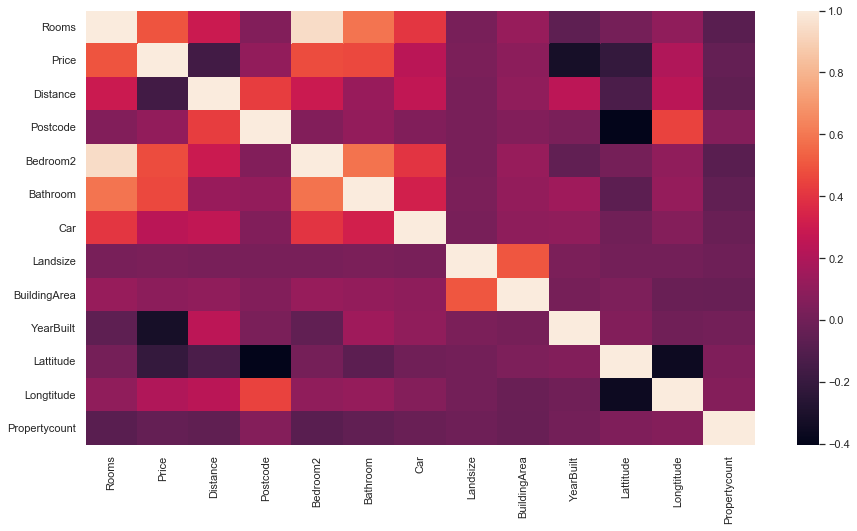

In [532]:
plt.rcParams["figure.figsize"] = 15,8
sns.heatmap(df_melb.corr())

## housing trade distribution function

In [588]:
def Distribution(x_axis,axis):#Differences in the number of housing trades
    
    x_axis.sort_values() 
    xx = x_axis.unique() 
    yy = x_axis.value_counts()

    axis.bar(xx, yy, width=0.3, facecolor='#9999ff')
    a=np.arange(len(xx))
    for a,b in zip(a, yy):
        axis.text(a, b, '%.0f'%b, ha='center', va='bottom', fontsize=10)
    axis.set_title('Distribution by %s'%x_axis.name)    

## price range distribution function

In [570]:
def price_distribution(hue,t,axis):
    axis = sns.countplot(x='Price_range', hue=hue, data=df_melb[df_melb['Type'] == t])
    axis.set_title('{0} type price range distribution of different {1}'.format(t,hue),fontsize=20)
    Mark_numbers(axis,12)

## Mark number on seaborn graph function

In [595]:
def Mark_numbers(axis,size):
    for p in axis.patches:
        axis.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=size,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

## Average price distribution function

In [617]:
def avg_price_bar(x, axis):
    if x == 'Rooms':
        avg_price = df_melb[[x,'Price']].groupby(x).mean().reset_index()
    else:
        avg_price = df_melb[[x,'Price']].groupby(x).mean().sort_values(by='Price', ascending=False).reset_index()
    #print(avg_price)
    axis.bar(avg_price[x].apply(str),avg_price['Price'],facecolor='#9999ff')
    a=np.arange(len(avg_price[x]))
    for a,b in zip(a, avg_price['Price']):
        axis.text(a, b, '%.1f'%b, ha='center', va='bottom', fontsize=14)
    #plt.xticks(rotation=45)

    axis.set_title('Average house prices in %s'%x)

## Distribution of housing trade by different Type, Method, Rigion, Council area 
    

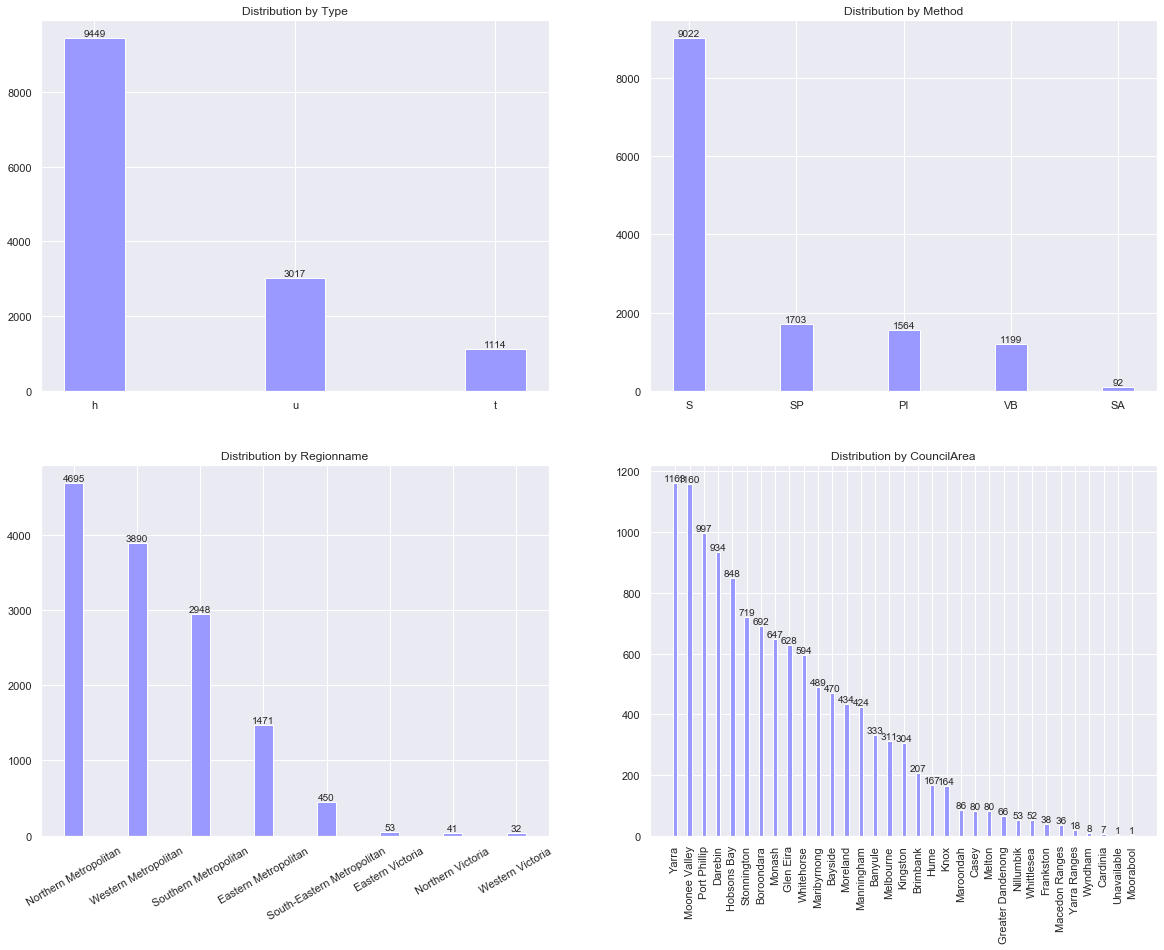

In [610]:
figure, axis = plt.subplots(2, 2,figsize=(20, 15))
Distribution(df_melb['Type'],axis[0,0])
Distribution(df_melb['Method'],axis[0,1])
Distribution(df_melb['Regionname'],axis[1,0])
Distribution(df_melb['CouncilArea'].dropna(),axis[1,1])
axis[1,0].tick_params(axis='x', labelrotation=30)
axis[1,1].tick_params(axis='x', labelrotation=90)

    The graph on the top left shows the distribution of transactions for the three different types of houses over the period, with Type H having the highest number of sales with 9,449, Type U with 3,017 and Type t with the lowest with only 1.
    The graph on the top right shows the distribution of transactions for the different saling method of houses over the period, 9,022 houses were sold by S, which is the most, and the lowest number of houses sold was by SA with only 92.
    The graph on the bottom left shows the distribution of the number of houses sold in the different regions, with relatively high numbers in regions Northern Metropolitan, Western Metropolitan and Southern Metropolitan, with the highest number being Northern Metropolitan, where 4,695 houses were sold during the period. The number of houses sold in Victoria is relatively low.
    The graph on the bottom right shows the number of housing sold in each concil area.

## Price_range column
    To visualise the distribution of price ranges, I set the prices into six ranges and added a new column called 'price_range' 

In [632]:
cut_labels1 = ['0-500,000', '500,000-750,000', '750,000-1,000,000', '1,000,000-1,500,000','1,500,000-2,000,000', '2,000,000+']
cut_bins1 = [0, 500000, 750000, 1000000, 1500000, 2000000, 9000000000]
df_melb['Price_range'] = pd.cut(df_melb['Price'], bins=cut_bins1, labels=cut_labels1)
df_melb['Price_range'].describe()

count                   13580
unique                      6
top       1,000,000-1,500,000
freq                     3282
Name: Price_range, dtype: object

## Distance_range column
    To visualise the distribution of Distance ranges, I set the Distance into six ranges and added a new column called 'Distance_range' 

In [631]:
cut_labels2 = ['0-5', '5-10', '10-15', '15-20','20-30', '30+']
cut_bins2 = [0, 5, 10,15, 20, 30, 100000]
df_melb['Distance_range'] = pd.cut(df_melb['Distance'], bins=cut_bins2, labels=cut_labels2)
df_melb['Distance_range'].describe()

count     13574
unique        6
top        5-10
freq       5097
Name: Distance_range, dtype: object

## Building area range column

In [603]:
cut_labels3 = ['0-50', '50-100', '100-150', '150-300','300-500', '500+']
cut_bins3 = [0, 50, 100,150, 300, 500, 100000000]
df_melb['BuildingArea_range'] = pd.cut(df_melb['BuildingArea'], bins=cut_bins3, labels=cut_labels3)
df_melb['BuildingArea_range'].describe()

count        7113
unique          6
top       100-150
freq         2511
Name: BuildingArea_range, dtype: object

## Price range distribution
    

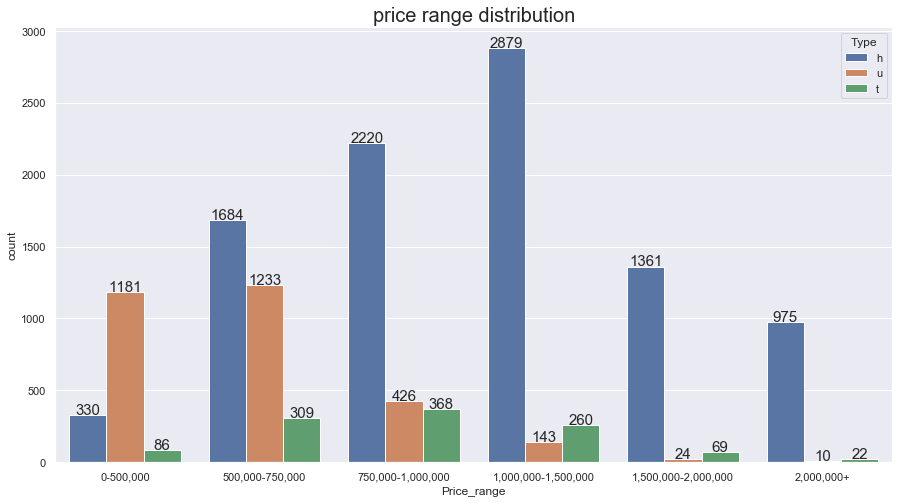

In [567]:
axis = sns.countplot(x='Price_range', hue='Type', data=df_melb)
axis.set_title('price range distribution',fontsize=20)
Mark_numbers(axis,15)

As can be seen that, most 'u' type houses' price were in the range of '0-750,000, and for the 'h' type houses, the distribution in the 1,000,000-1,500,000 price range is the most frequent,'t' type houses are mainly distributied in the price range of 500000-750,000, 750,000-1,000,000 and 1,000,000-1,500,000.

## Price distribution comparision by type and region
    
    

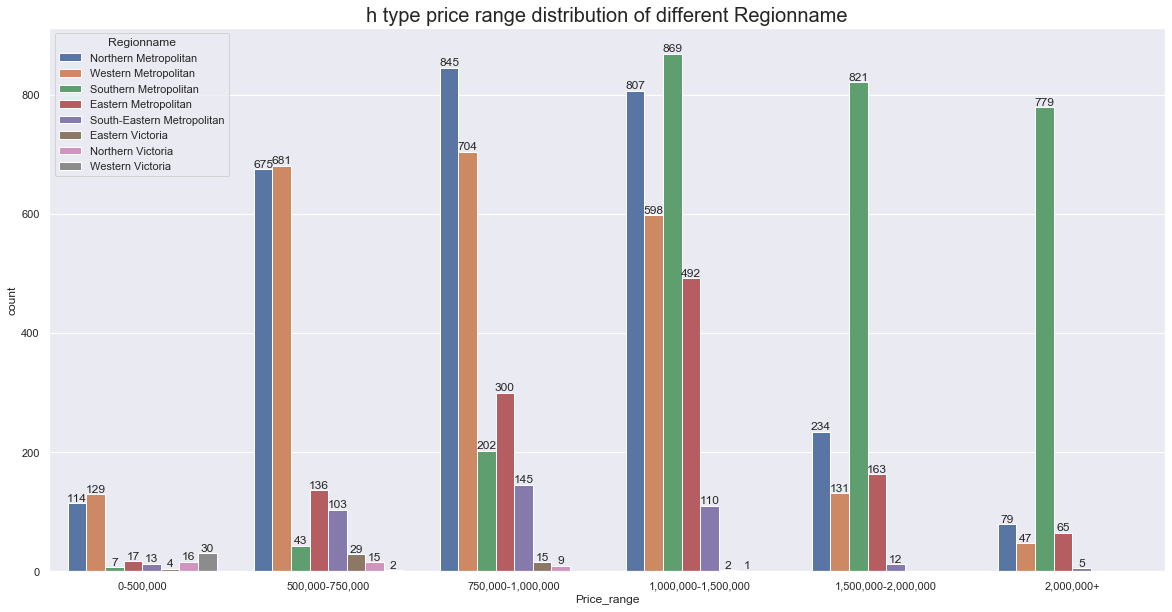

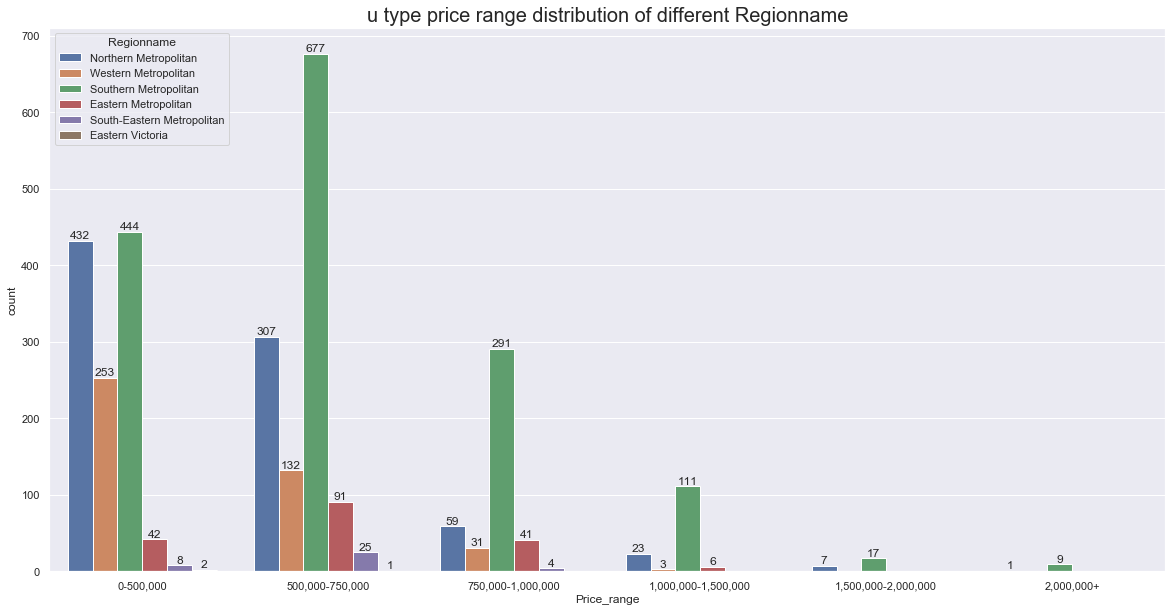

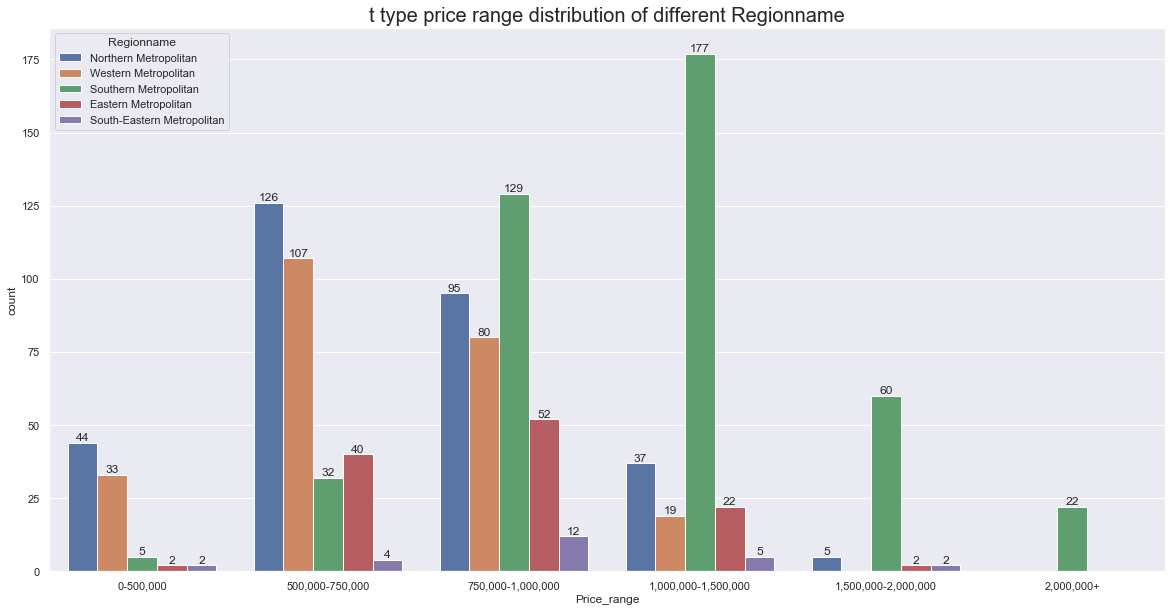

In [571]:
figure1, axis1 = plt.subplots(figsize=(20, 10))
price_distribution('Regionname','h',axis1)
figure2, axis2 = plt.subplots(figsize=(20, 10))
price_distribution('Regionname','u',axis2)
figure3, axis3 = plt.subplots(figsize=(20, 10))
price_distribution('Regionname','t',axis3)

## relation between price and distance

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


-0.1625218378638254

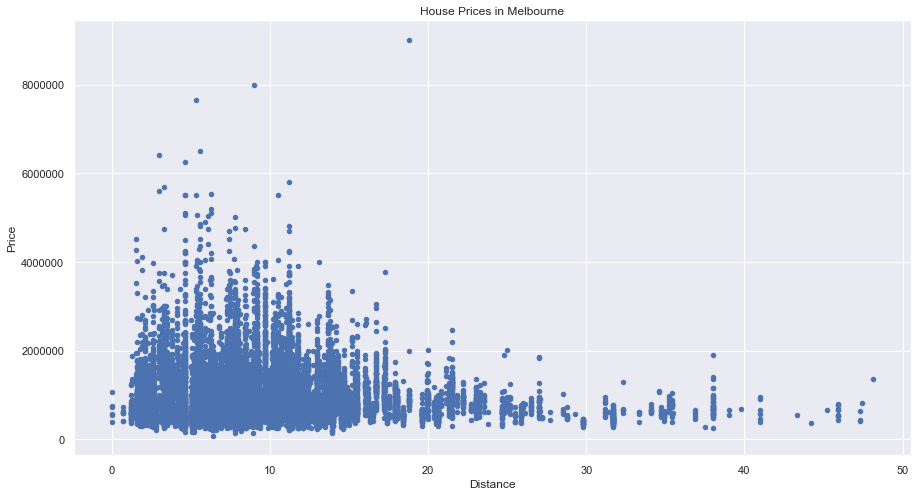

In [612]:
df_melb.plot(x='Distance', y='Price', kind='scatter',title='House Prices in Melbourne')
#tried to plot with pandas directly
df_melb['Distance'].corr(df_melb['Price'])

## distance range distribution

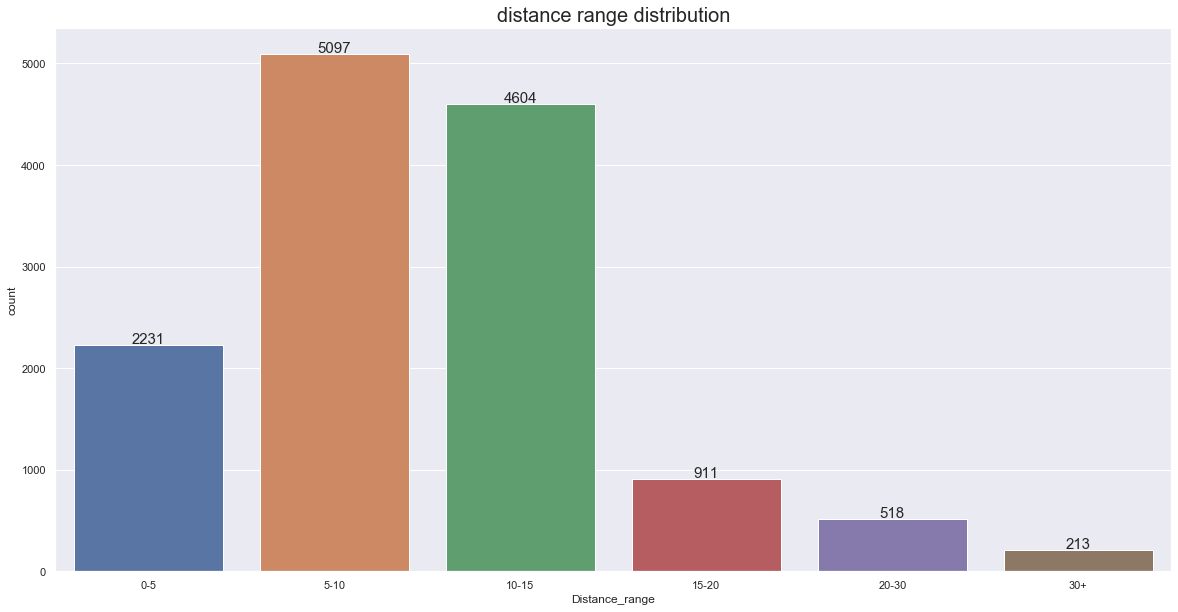

In [598]:
figure, axis = plt.subplots(figsize=(20, 10))
axis = sns.countplot(x='Distance_range', data=df_melb)
axis.set_title('distance range distribution',fontsize=20)
Mark_numbers(axis,15)

## distance range distribution on price range

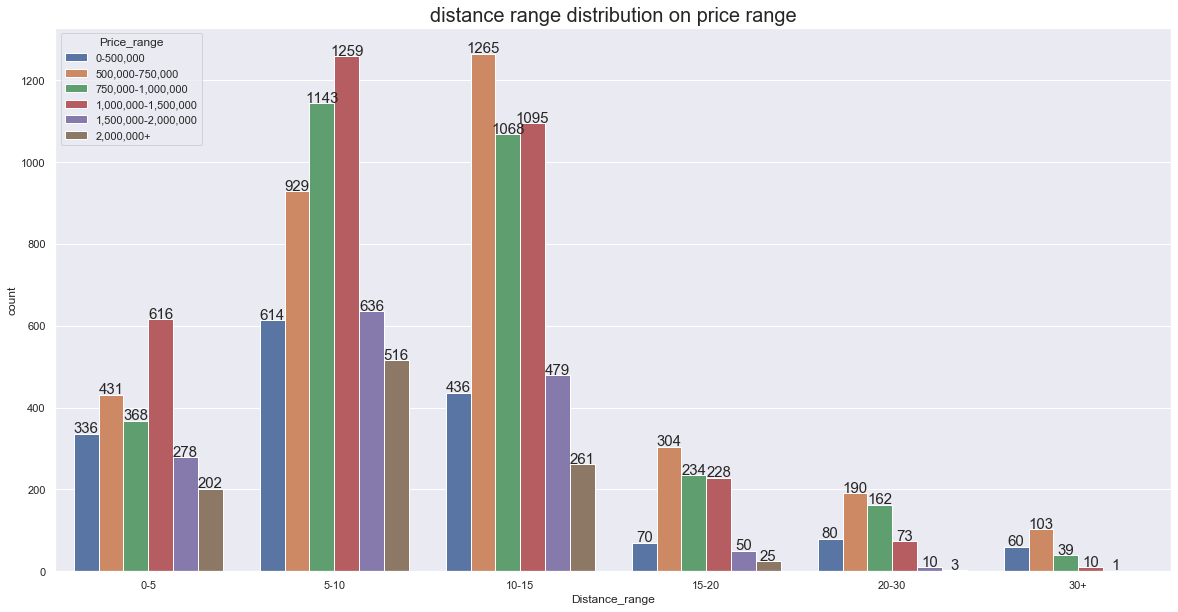

In [611]:
figure, axis = plt.subplots(figsize=(20, 10))
axis = sns.countplot(x='Distance_range',hue = 'Price_range', data=df_melb)
axis.set_title('distance range distribution on price range',fontsize=20)
Mark_numbers(axis,15)

## relation between price and BuildingArea

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.0909806076842059

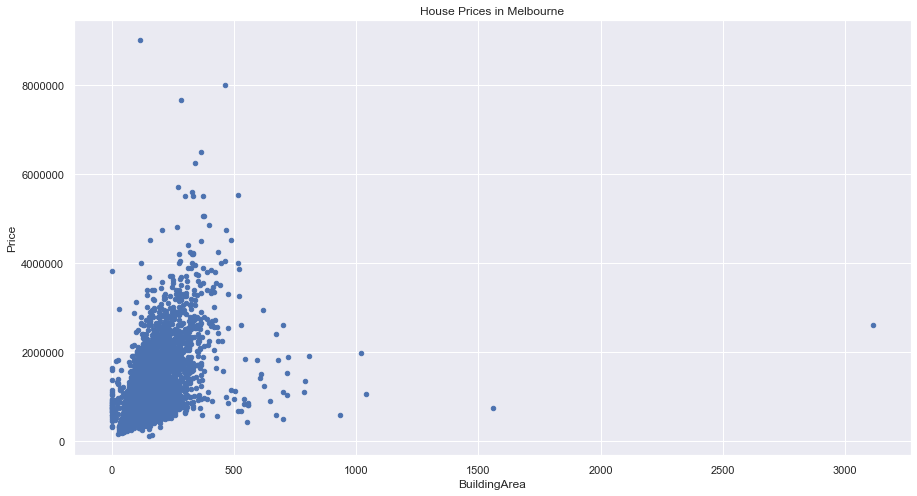

In [613]:
df_melb.dropna().plot(x='BuildingArea', y='Price', kind='scatter',title='House Prices in Melbourne')
df_melb['BuildingArea'].corr(df_melb['Price'])

## BuildingArea range distribution

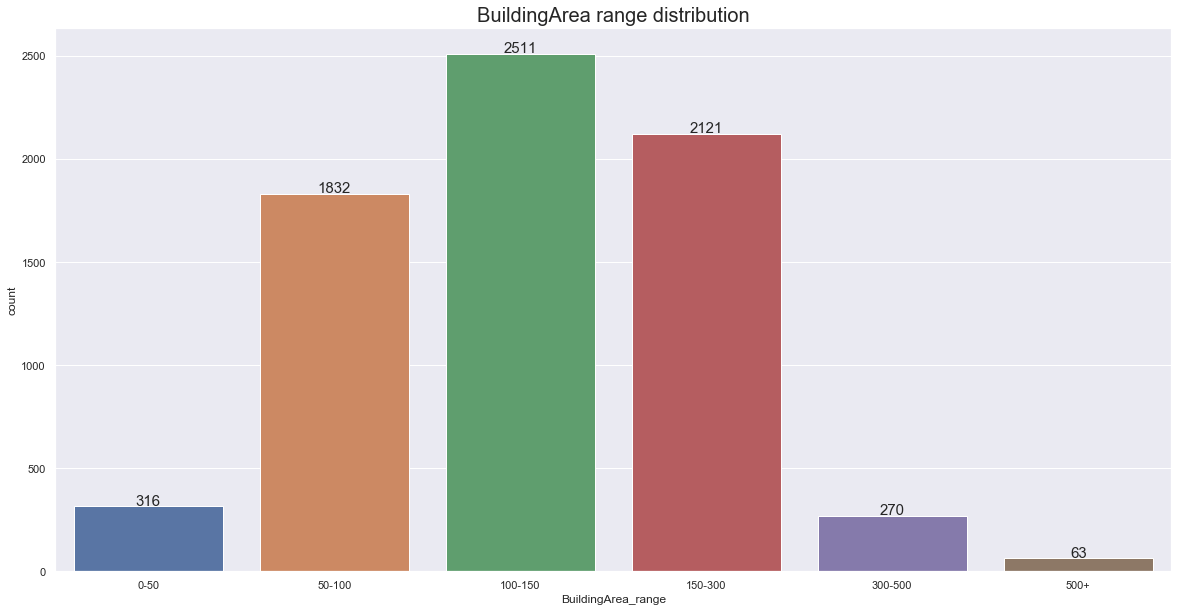

In [614]:
figure, axis = plt.subplots(figsize=(20, 10))
axis = sns.countplot(x='BuildingArea_range', data=df_melb)
axis.set_title('BuildingArea range distribution',fontsize=20)
Mark_numbers(axis,15)

## BuildingArea range distribution on price range

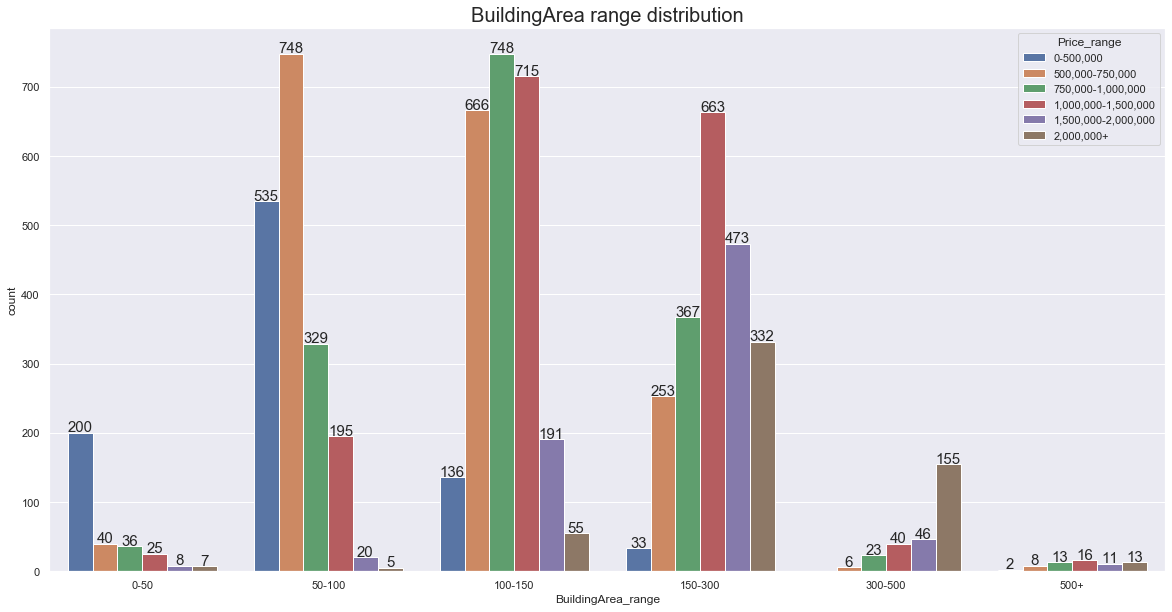

In [615]:
figure, axis = plt.subplots(figsize=(20, 10))
axis = sns.countplot(x='BuildingArea_range',hue = 'Price_range', data=df_melb)
axis.set_title('BuildingArea range distribution',fontsize=20)
Mark_numbers(axis,15)

In [616]:
#df_melb['Price'].plot(kind='hist',title='Distribution of House Prices in Melbourne')


## Boxplot of price in 3 types

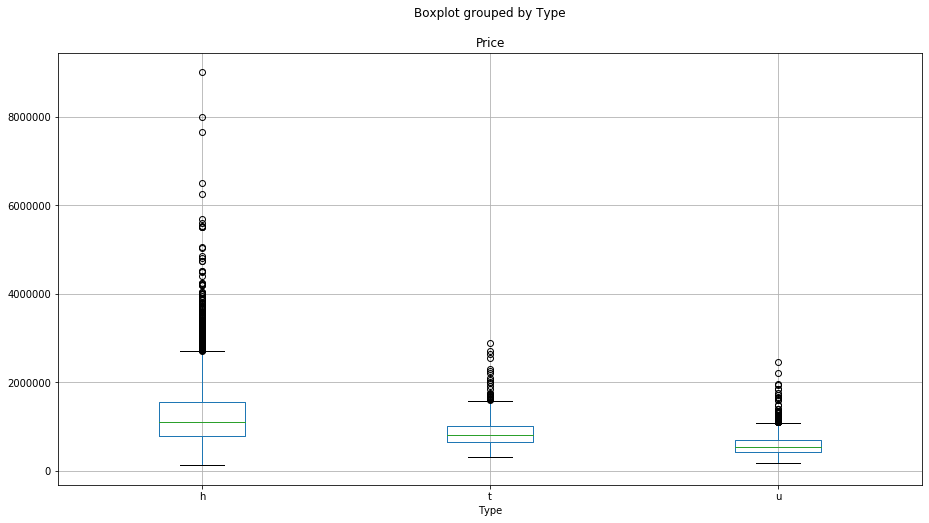

In [27]:
df_melb.boxplot(column='Price', by='Type')

## average price distribution in different regions, types and Number of rooms.

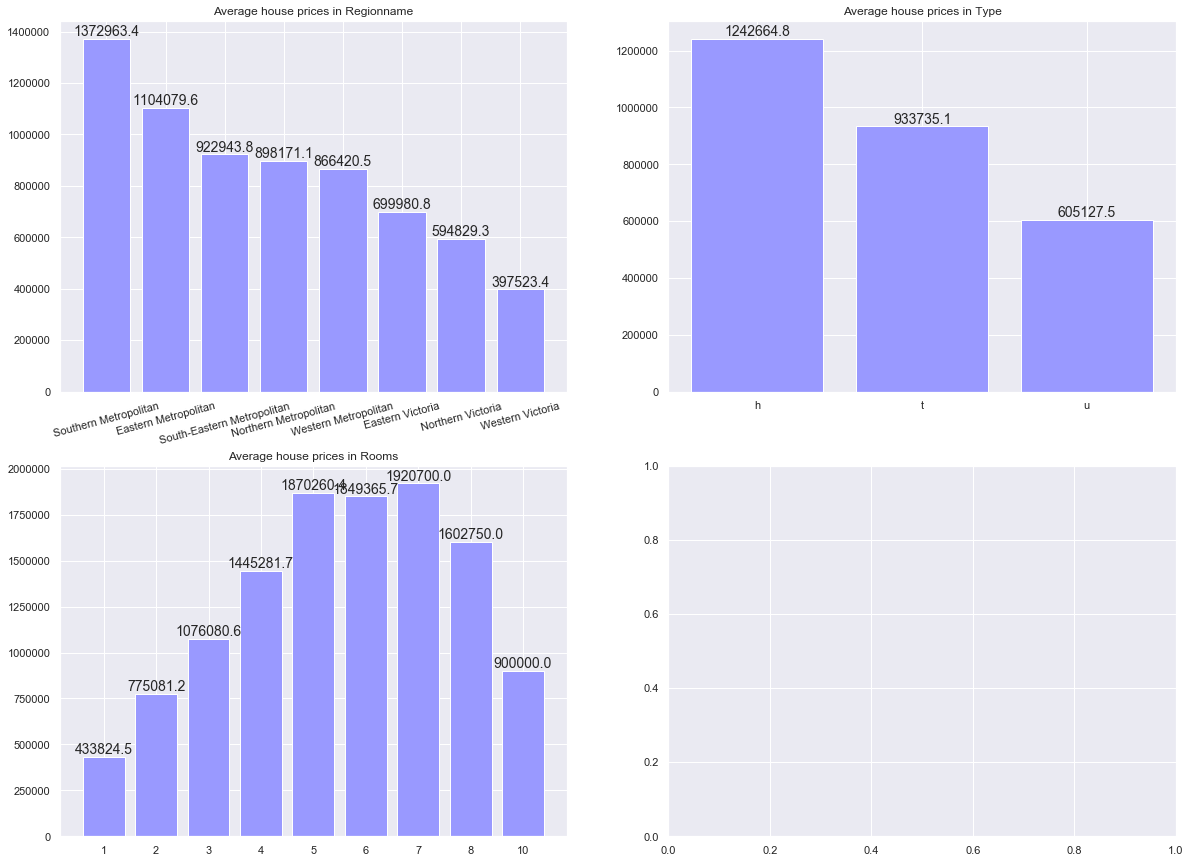

In [609]:
figure, axis = plt.subplots(2,2, figsize=(20, 15))
avg_price_bar('Regionname', axis[0,0])
avg_price_bar('Type', axis[0,1])
axis[0,0].tick_params(axis='x', labelrotation=15)
avg_price_bar('Rooms', axis[1,0])


## Changes in the average price of different types of housing over time

(array([735964., 736055., 736146., 736238., 736330., 736420., 736511.,
        736603., 736695.]), <a list of 9 Text xticklabel objects>)

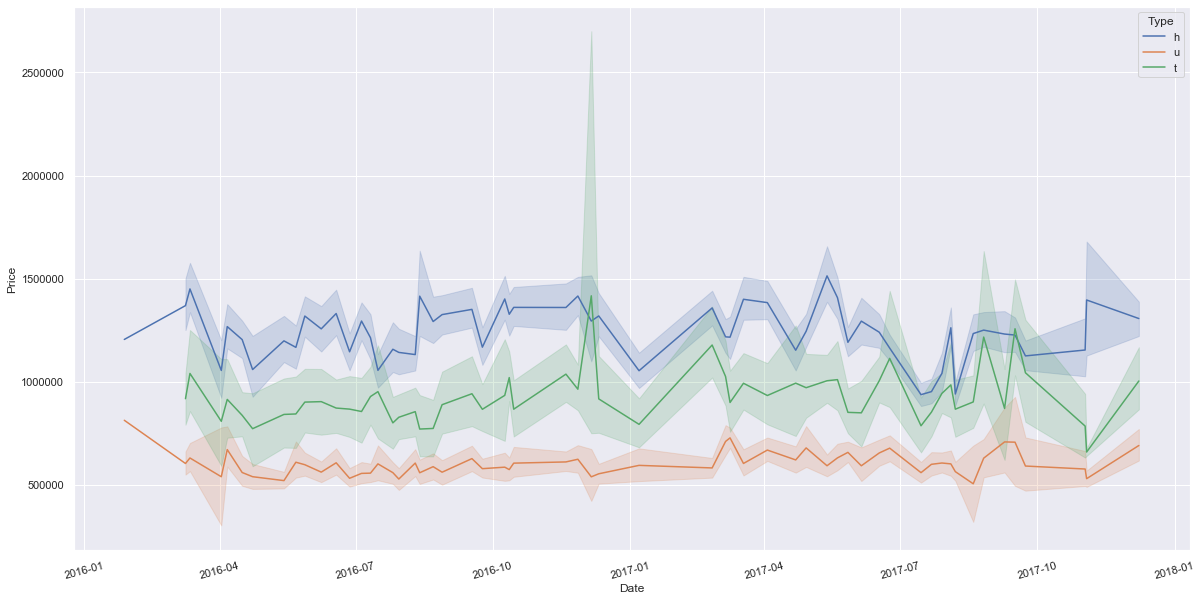

In [629]:
figure, axis = plt.subplots(figsize=(20, 10))
axis = sns.lineplot(x="Date", y="Price",hue = "Type", data=df_melb)

plt.xticks(rotation=15)

## Group the data set by month

In [619]:
months = df_melb[['Date','Price']].groupby(pd.Grouper(key='Date',freq='M')).mean().sort_values(by='Date', ascending=True).reset_index()
print(months)

         Date         Price
0  2016-01-31  1.009000e+06
1  2016-02-29           NaN
2  2016-03-31  1.183522e+06
3  2016-04-30  1.020441e+06
4  2016-05-31  1.033825e+06
5  2016-06-30  1.029903e+06
6  2016-07-31  9.834824e+05
7  2016-08-31  1.051956e+06
8  2016-09-30  1.064268e+06
9  2016-10-31  1.135970e+06
10 2016-11-30  1.173181e+06
11 2016-12-31  1.104944e+06
12 2017-01-31  9.392906e+05
13 2017-02-28  1.169051e+06
14 2017-03-31  1.126770e+06
15 2017-04-30  1.074841e+06
16 2017-05-31  1.140074e+06
17 2017-06-30  1.098000e+06
18 2017-07-31  8.830159e+05
19 2017-08-31  1.059833e+06
20 2017-09-30  1.168733e+06
21 2017-10-31           NaN
22 2017-11-30  9.845881e+05
23 2017-12-31  1.179493e+06


## Average monthly house price change.

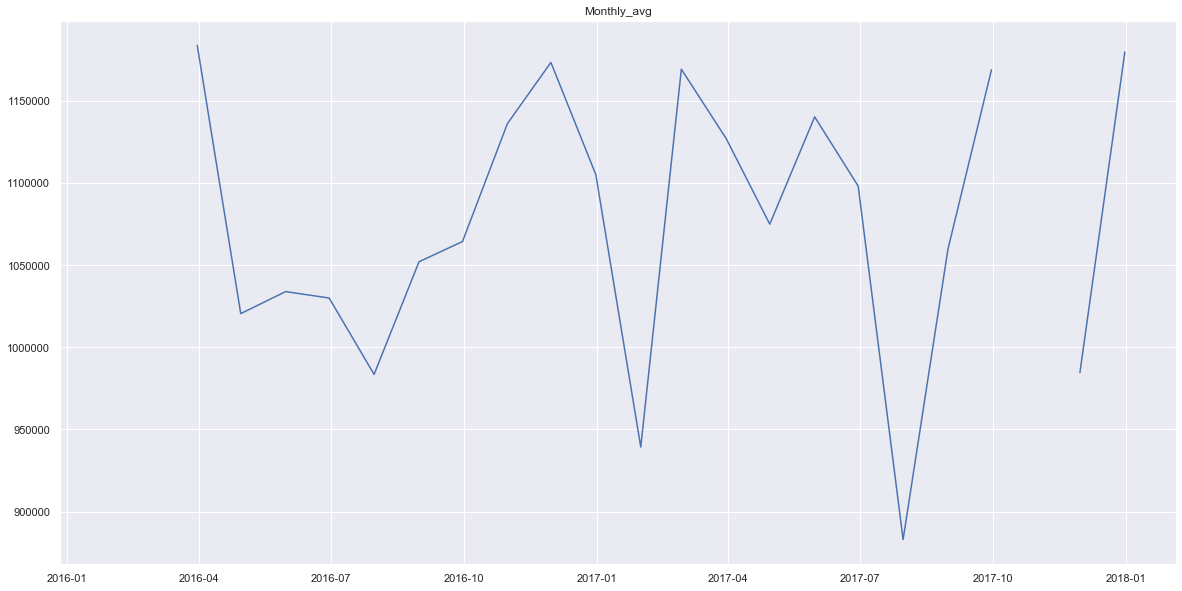

In [624]:
figure, axis = plt.subplots(figsize=(20, 10))
axis = plt.plot(months['Date'], months['Price'])
plt.title('Monthly_avg')
plt.rcParams["figure.figsize"]=10,8
plt.show()

## Number of houses sold per month by type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

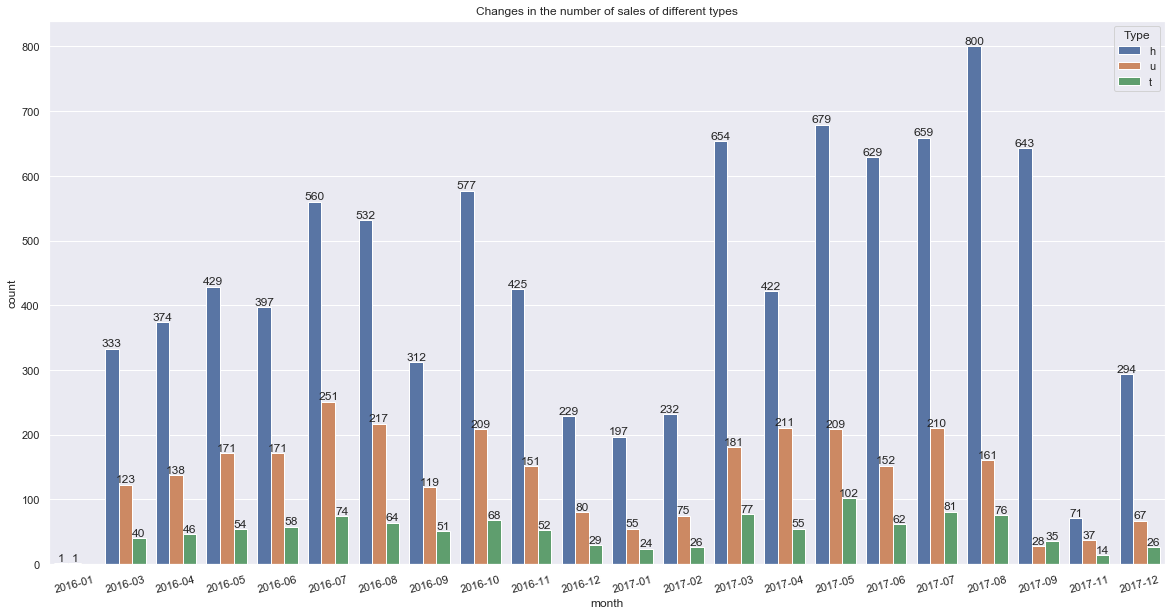

In [625]:
df_melb['month'] = df_melb['Date'].dt.to_period('M')
figure, axis = plt.subplots(figsize=(20, 10))
axis = sns.countplot(x="month", hue="Type", data=df_melb,order = df_melb['month'].sort_values().unique())
axis.set_title('Changes in the number of sales of different types')
Mark_numbers(axis,12)
plt.xticks(rotation=15)


## Average monthly price for different types of housing

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

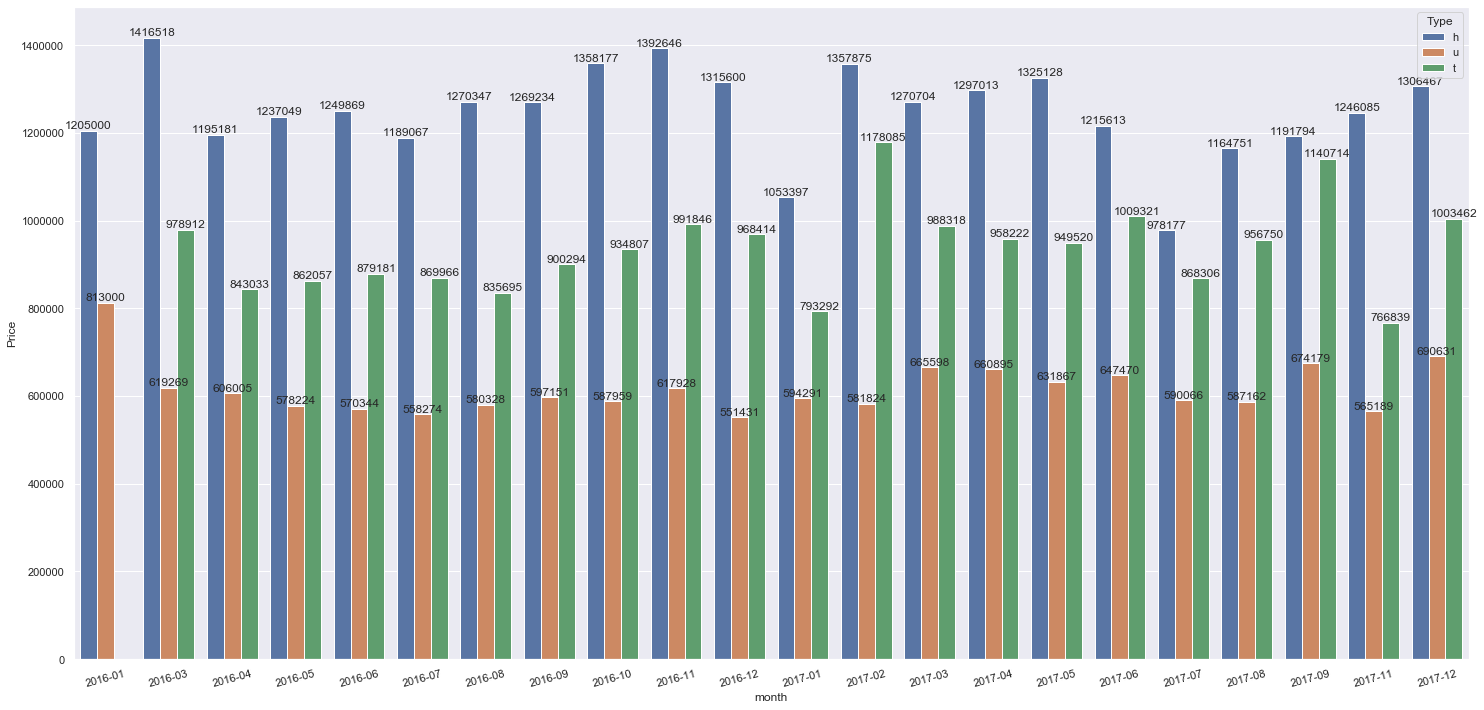

In [627]:
figure, axis = plt.subplots(figsize=(25, 12))
avg_m = df_melb[['month','Price','Type']].groupby(['month', 'Type']).mean().sort_values(by='month', ascending=True).reset_index()
axis = sns.barplot(x="month", y="Price",hue = "Type", data=avg_m, capsize=0,order = df_melb['month'].sort_values().unique())

Mark_numbers(axis,12)
plt.xticks(rotation=15)


(array([735964., 736055., 736146., 736238., 736330., 736420., 736511.,
        736603., 736695.]), <a list of 9 Text xticklabel objects>)

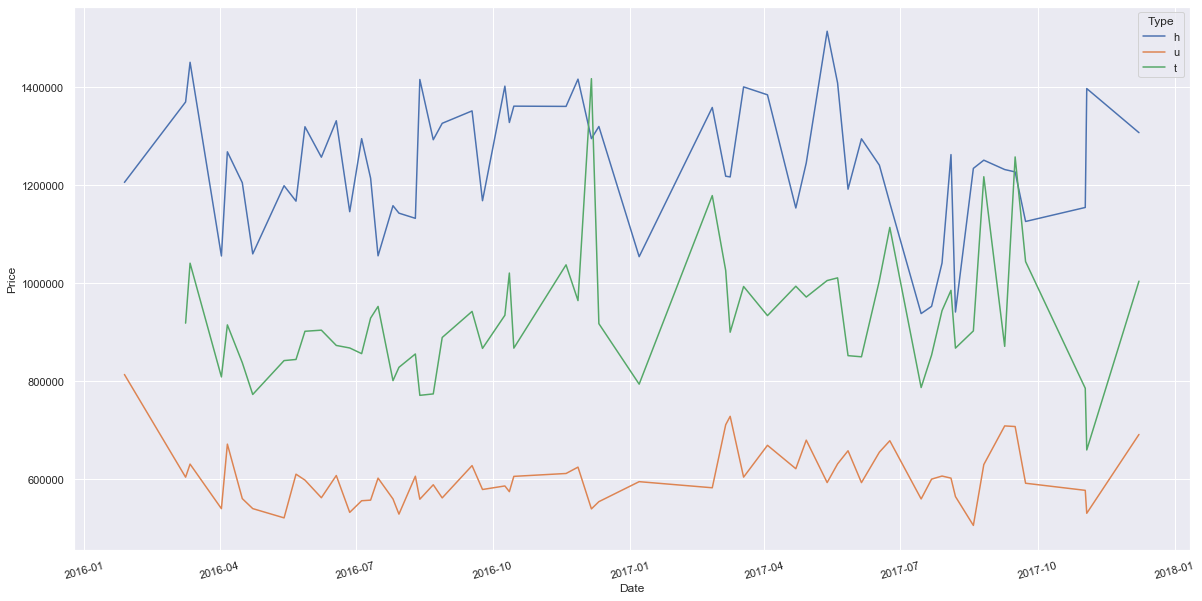

In [628]:
avg_d = df_melb[['Date','Price','Type']].groupby(['Date', 'Type']).mean().sort_values(by='Date', ascending=True).reset_index()

figure, axis = plt.subplots(figsize=(20, 10))
axis = sns.lineplot(x="Date", y="Price",hue = "Type", data=avg_d)
for p in axis.patches:
    axis.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xticks(rotation=15)

In [359]:
#try plotly
avg_price = df_melb[['Type','Price']].groupby('Type').mean().sort_values(by='Price', ascending=False)
print(avg_price)

fig = px.bar(avg_price, x=avg_price.index, y='Price')
fig.show()
#fig = px.bar(avg_price, x = 'month',y = 'Price')
#fig.show()

             Price
Type              
h     1.273016e+06
t     8.841816e+05
u     5.883745e+05


In [650]:
def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f})'.format(x, len(df_melb['Type'])*x/100)

['h' 'u' 't']
h    9449
u    3017
t    1114
Name: Type, dtype: int64
69.5802628993988
22.216494381427765
8.203239738941193


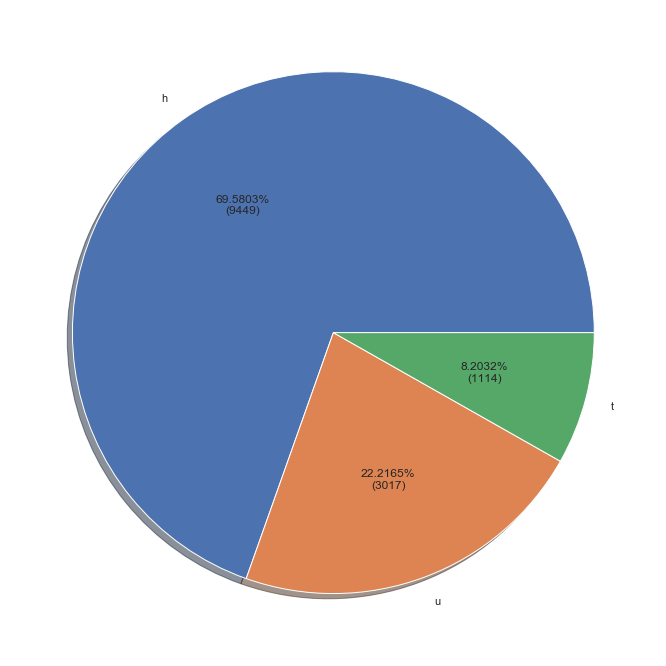

In [651]:
figure, axis = plt.subplots(figsize=(25, 12))
df_melb['Type'].sort_values() 
xx = df_melb['Type'].unique() 
yy = df_melb['Type'].value_counts()
print(xx)
print(yy)
axis = plt.pie(yy,labels=xx,autopct=my_fmt, shadow=True)
a=np.arange(len(xx))
#for a,b in zip(a, yy):
 #   axis.text(a, b,'%.0f'%b, ha='center', va='bottom', fontsize=10)
#axis.set_title('Distribution by ')  autopct=my_fmt,